<a href="https://colab.research.google.com/github/Bits-Deep-Analytics/Predictive_analytics/blob/dev/Scripts/EDA_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open this notebook in Colaboratory"/></a>

In [4]:
# Read in the Churn data set
library(ggplot2)

In [5]:
test <- read.csv(file = 'https://raw.githubusercontent.com/deep-bits/PA/main/EDA/churn-bigml-20.csv', sep = ',')
train <- read.csv(file = 'https://raw.githubusercontent.com/deep-bits/PA/main/EDA/churn-bigml-80.csv', sep = ',')
churn <- rbind(test, train)

In [6]:
# Show the first ten records
churn[1:10,]

,State,Account.length,Area.code,International.plan,Voice.mail.plan,Number.vmail.messages,Total.day.minutes,Total.day.calls,Total.day.charge,Total.eve.minutes,Total.eve.calls,Total.eve.charge,Total.night.minutes,Total.night.calls,Total.night.charge,Total.intl.minutes,Total.intl.calls,Total.intl.charge,Customer.service.calls,Churn
,<chr>,<int>,<int>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<chr>
1,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
2,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
3,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
4,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
5,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
6,AK,36,408,No,Yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,False
7,MI,65,415,No,No,0,211.3,120,35.92,162.6,122,13.82,134.7,118,6.06,13.2,5,3.56,3,False
8,ID,119,415,No,No,0,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,5,True
9,VA,10,408,No,No,0,186.1,112,31.64,190.2,66,16.17,282.8,57,12.73,11.4,6,3.08,2,False


In [7]:
# Summarize the Churn variable
sum.churn <- c(sum(churn$Churn == "True"), sum(churn$Churn == "False"))
sum.churn

[1]  483 2850

In [8]:
# Calculate proportion of churners
prop.churn <- sum.churn / length(churn$Churn)
prop.churn

[1] 0.1449145 0.8550855

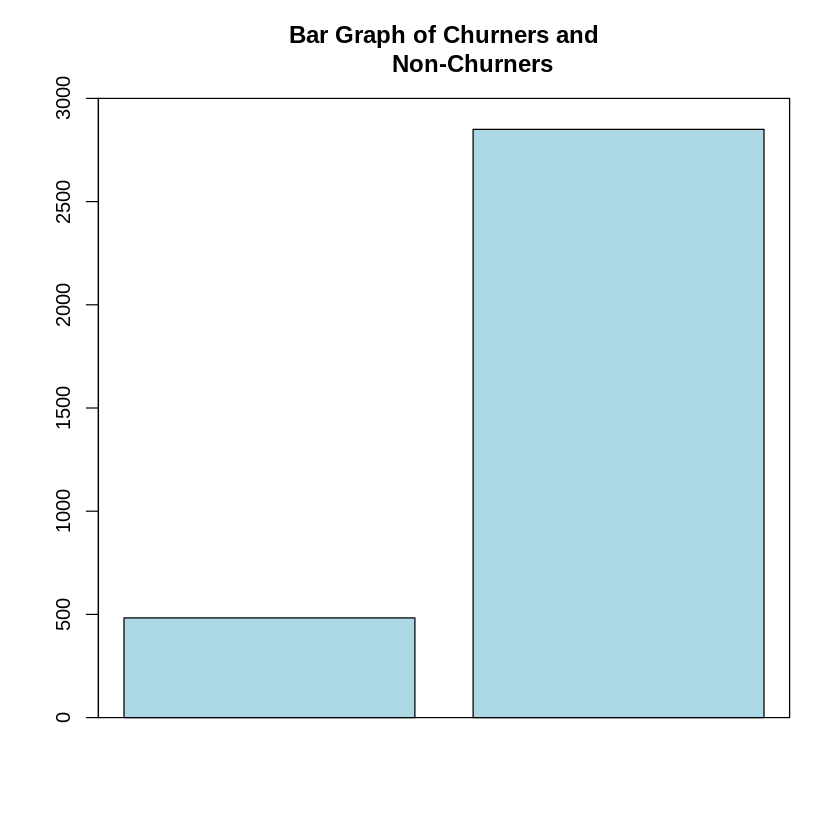

In [9]:
# Bar chart of variable Churn

barplot(sum.churn,
        ylim = c(0, 3000),
        main = "Bar Graph of Churners and
        Non-Churners",
        col = "lightblue")

box(which = "plot",
    lty = "solid",
    col="black")

In [10]:
# Make a table for counts of Churn and International Plan
counts <- table(churn$Churn,
                churn$International.plan,
                dnn=c("Churn", "International Plan"))
counts

       International Plan
Churn     No  Yes
  False 2664  186
  True   346  137

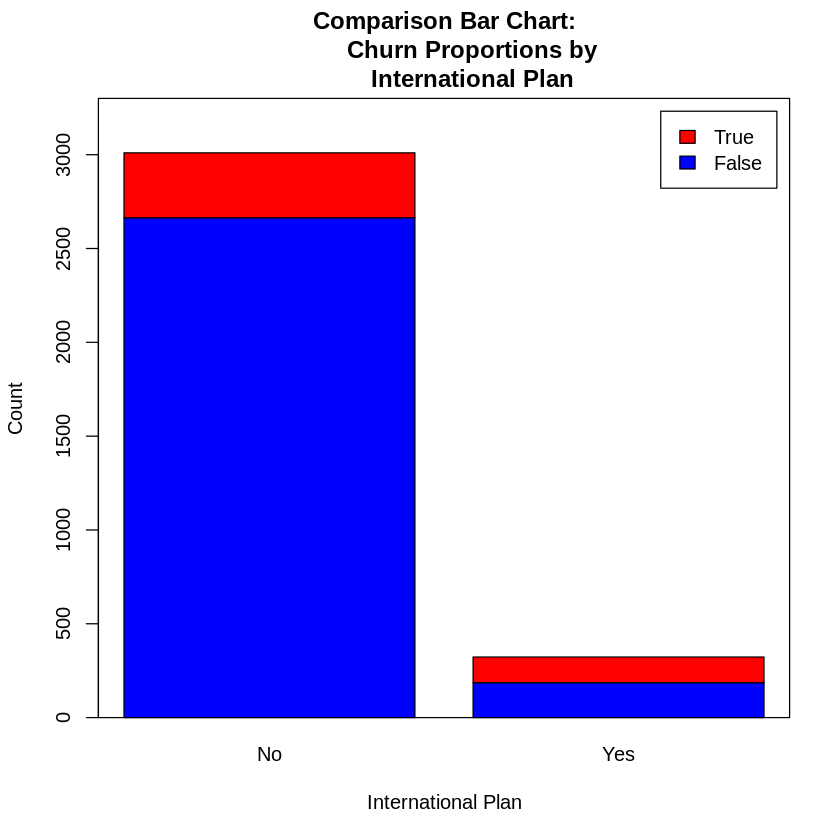

In [11]:
#Overlayed bar chart
barplot(counts,
        legend = rownames(counts),
        col = c("blue", "red"),
        ylim = c(0, 3300),
        ylab = "Count",
        xlab = "International Plan",
        main = "Comparison Bar Chart:
        Churn Proportions by
        International Plan")

box(which = "plot",
    lty = "solid",
    col="black")

In [12]:
# Create a table with sums for both variables
sumtable <- addmargins(counts, FUN = sum)
sumtable

Margins computed over dimensions
in the following order:
1: Churn
2: International Plan


,No,Yes,sum
False,2664,186,2850
True,346,137,483
sum,3010,323,3333


In [13]:
# Create a table of proportions over rows
row.margin <- round(prop.table(counts, margin = 1), 4)*100
row.margin

       International Plan
Churn      No   Yes
  False 93.47  6.53
  True  71.64 28.36

In [14]:
# Create a table of proportions over columns
col.margin <- round(prop.table(counts, margin = 2), 4)*100
col.margin

       International Plan
Churn      No   Yes
  False 88.50 57.59
  True  11.50 42.41

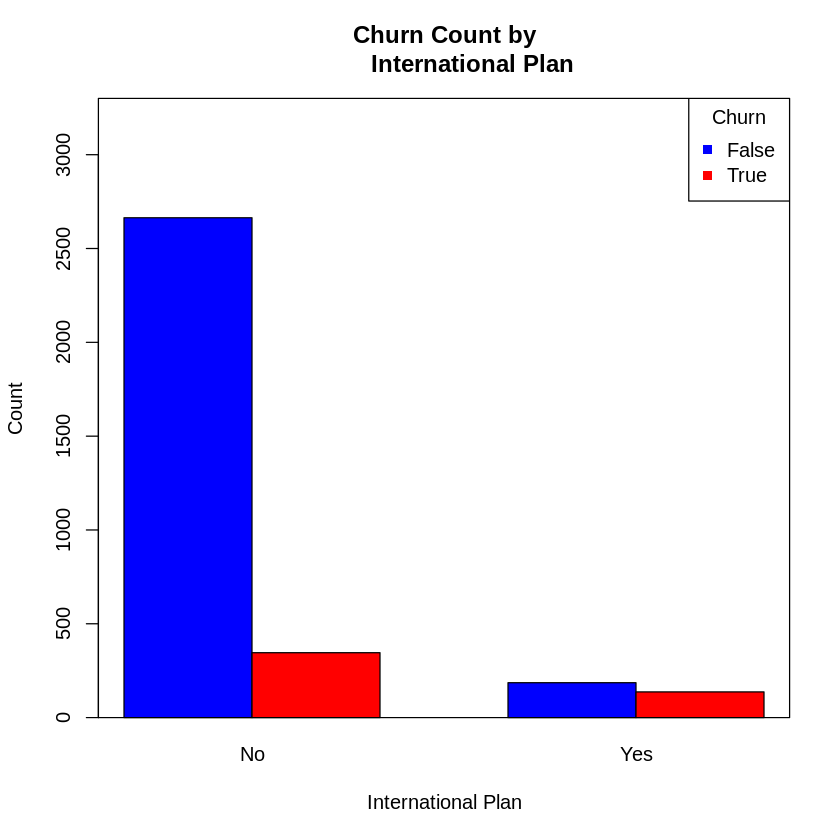

In [15]:
# Clustered Bar Chart, with legend
barplot(counts,
        col = c("blue", "red"),
        ylim = c(0, 3300),
        ylab = "Count",
        xlab = "International Plan",
        main = "Churn Count by
        International Plan",
        beside = TRUE)
legend("topright",
       c(rownames(counts)),
       col = c("blue", "red"),
       pch = 15,
       title = "Churn")
box(which = "plot",
    lty = "solid",
    col="black")

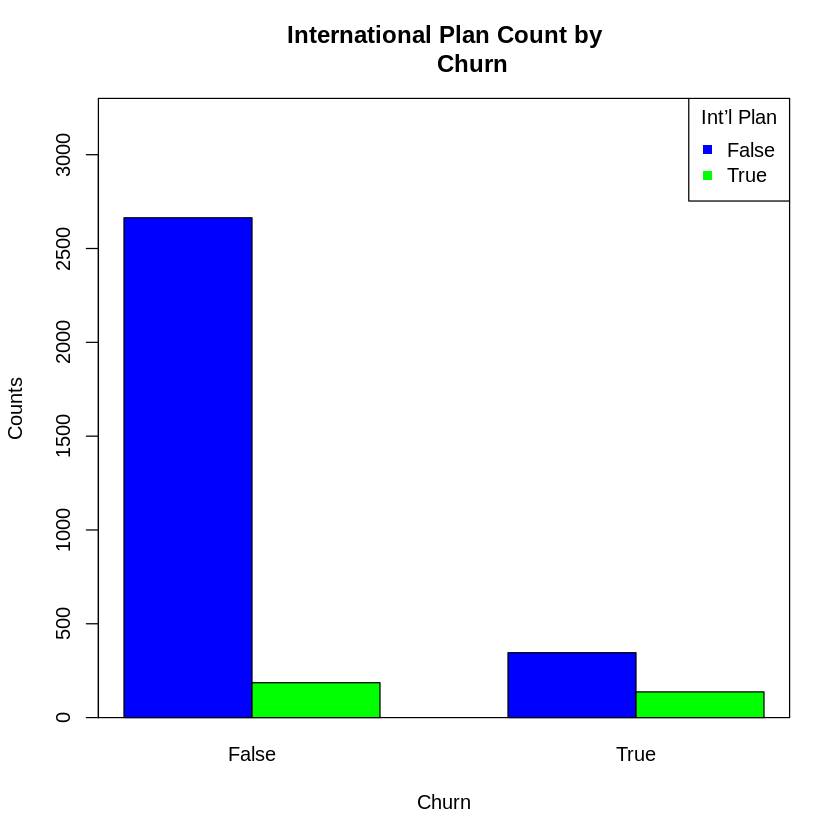

In [16]:
# Clustered Bar Chart of Churn and International Plan with legend
barplot(t(counts),
        col = c("blue", "green"),
        ylim = c(0, 3300),
        ylab = "Counts",
        xlab = "Churn",
        main = "International Plan Count by
        Churn",
        beside = TRUE)
legend("topright",
       c(rownames(counts)),
       col = c("blue", "green"),
       pch = 15,
       title = "Int’l Plan")
box(which = "plot",
    lty = "solid",
    col="black")

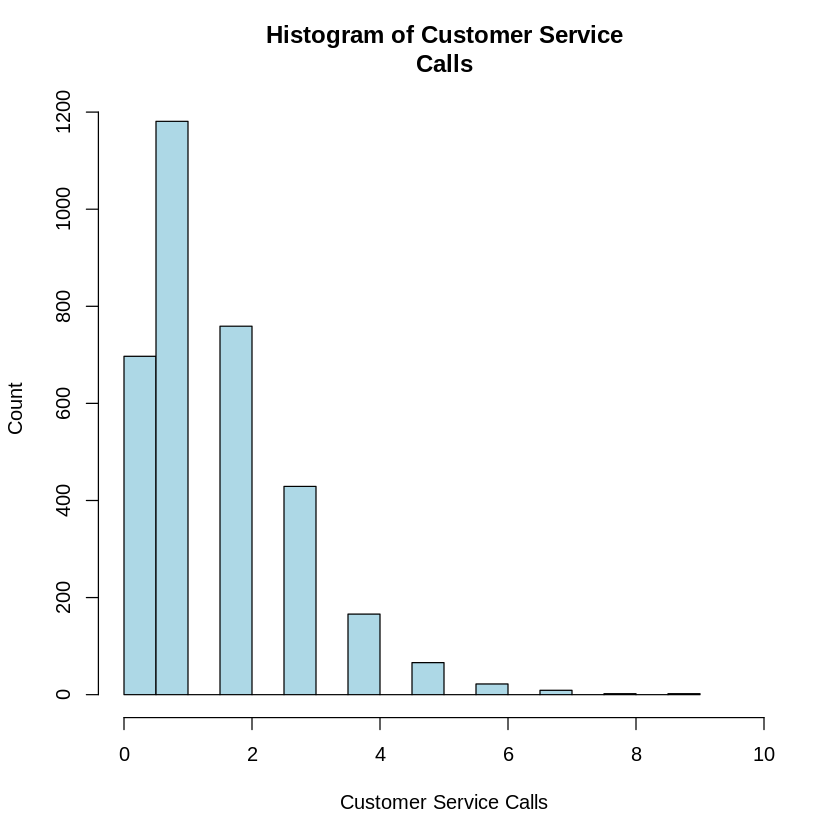

In [17]:
# Histogram of non-overlayed Customer Service Calls
hist(churn$Customer.service.calls,
     xlim = c(0,10),
     col = "lightblue",
     ylab = "Count",
     xlab = "Customer Service Calls",
     main = "Histogram of Customer Service
Calls")

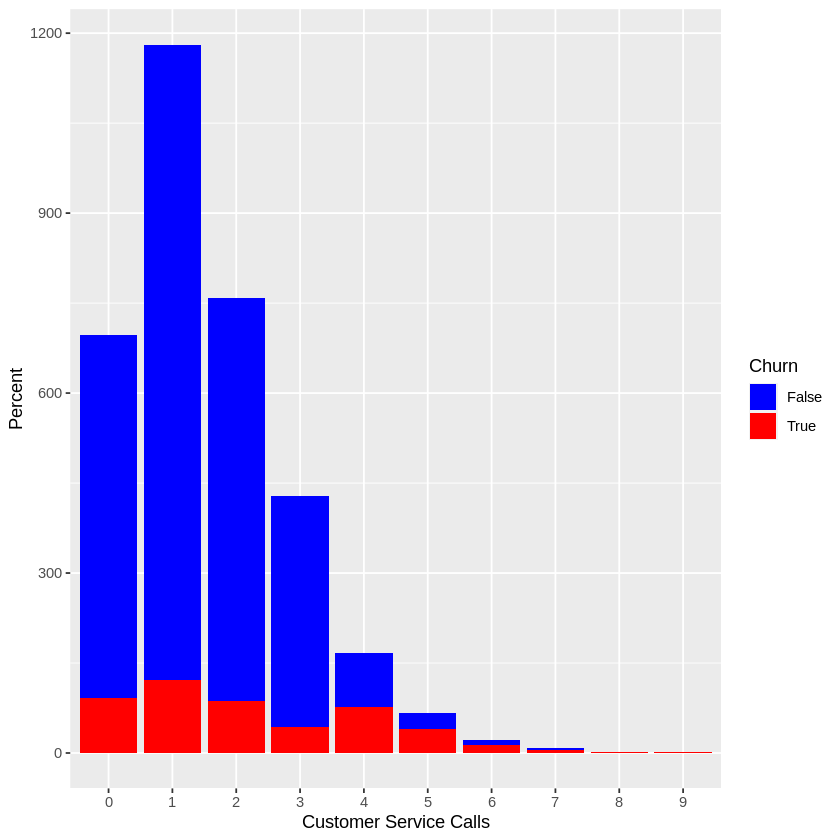

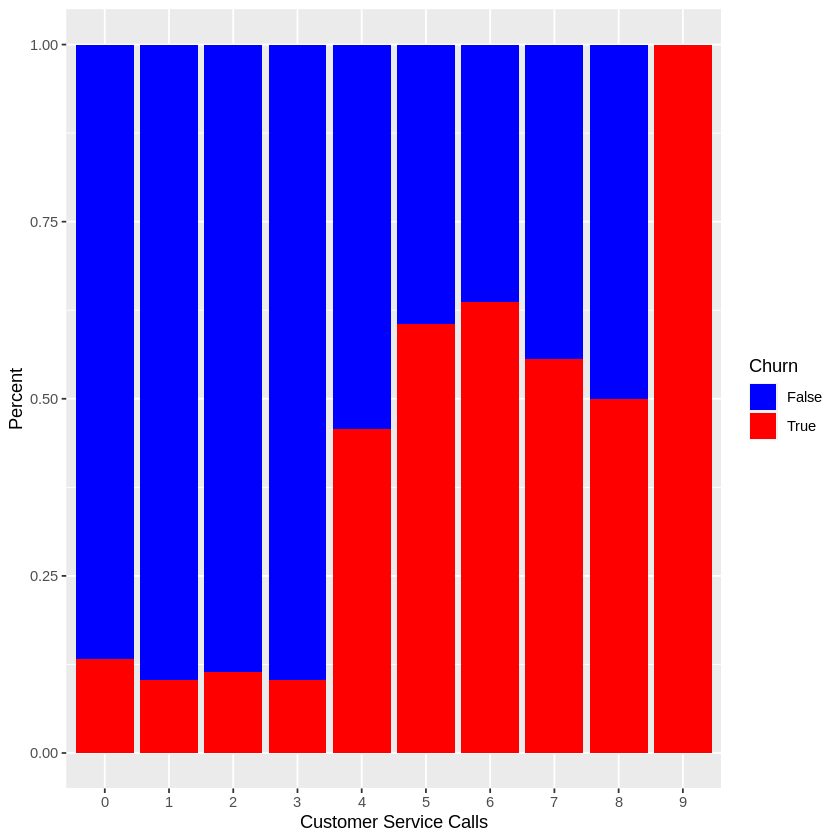

In [18]:
# Overlayed bar charts
ggplot() +
    geom_bar(data = churn,
             aes(x = factor(Customer.service.calls),
                 fill = factor(Churn)),
             position = "stack") +
    scale_x_discrete("Customer Service Calls") +
    scale_y_continuous("Percent") +
    guides(fill=guide_legend(title="Churn")) +
    scale_fill_manual(values=c("blue", "red"))
  
  ggplot() +
    geom_bar(data=churn,
             aes(x = factor(Customer.service.calls),
                 fill = factor(Churn)),
             position = "fill") +
    scale_x_discrete("Customer Service Calls") +
    scale_y_continuous("Percent") +
    guides(fill=guide_legend(title="Churn"))+
    scale_fill_manual(values=c("blue", "red"))

In [19]:
# Two-sample T-Test for Int’l Calls

# Partition data
churn.false <- subset(churn, churn$Churn == "False")
churn.true <- subset(churn, churn$Churn == "True")

# Run the test
t.test(churn.false$Total.intl.calls, churn.true$Total.intl.calls)


	Welch Two Sample t-test

data:  churn.false$Total.intl.calls and churn.true$Total.intl.calls
t = 2.9604, df = 640.64, p-value = 0.003186
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1243807 0.6144620
sample estimates:
mean of x mean of y 
 4.532982  4.163561 


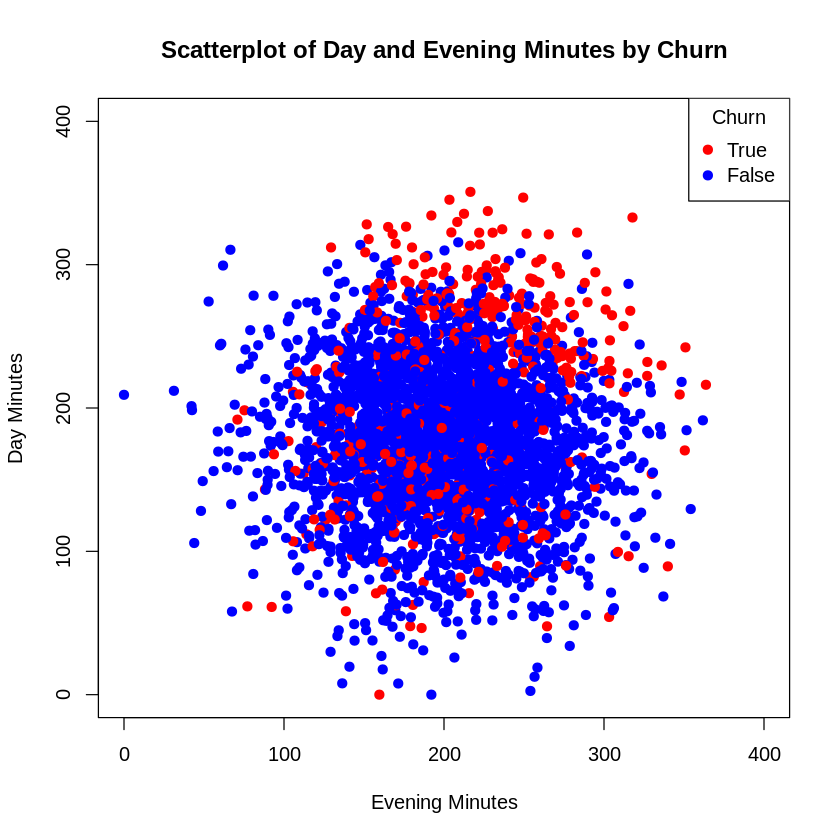

In [20]:
# Scatterplot of Evening Minutes and Day Minutes, colored

plot(churn$Total.eve.minutes,
     churn$Total.day.minutes,
     xlim = c(0, 400),
     ylim = c(0, 400),
     xlab = "Evening Minutes",
     ylab = "Day Minutes",
     main = "Scatterplot of Day and Evening Minutes by Churn",
     col = ifelse(churn$Churn=="True","red","blue"), pch = 19)

legend("topright", c("True","False"), col = c("red", "blue"), pch = 19, title = "Churn")

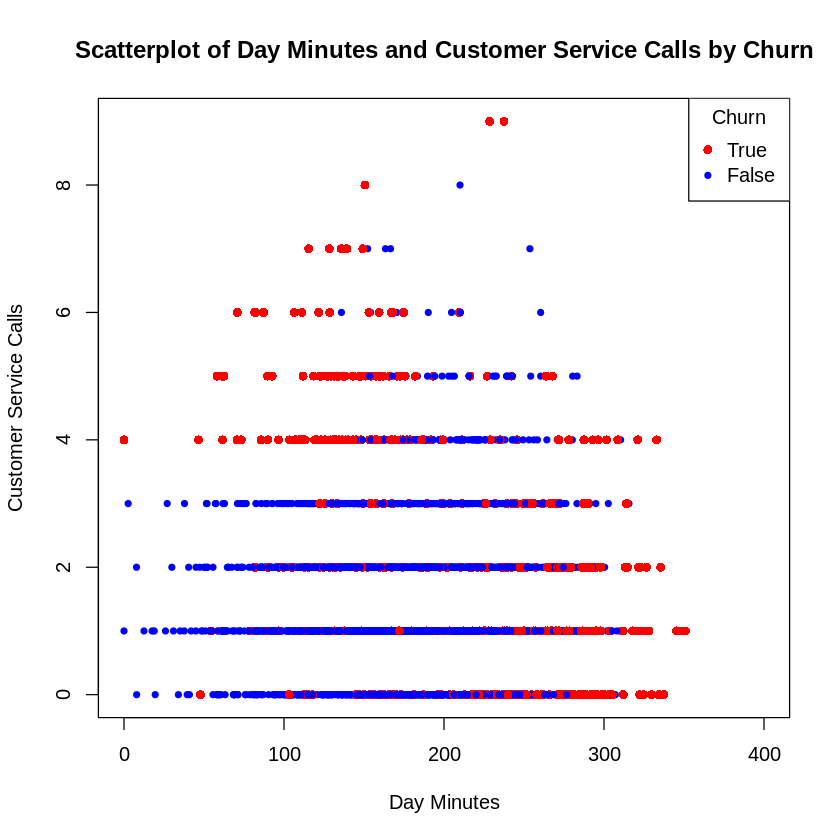

In [21]:
# Scatterplot of Day Minutes and Customer Service Calls, colored by Churn
plot(churn$Total.day.minutes,
     churn$Customer.service.calls,
     xlim = c(0, 400),
     xlab = "Day Minutes",
     ylab = "Customer Service Calls",
     main = "Scatterplot of Day Minutes and Customer Service Calls by Churn", col = ifelse(churn$Churn=="True","red","blue"),
     pch = ifelse(churn$Churn=="True",16,20))

legend("topright",c("True","False"),col = c("red","blue"),pch = c(16, 20),title = "Churn")


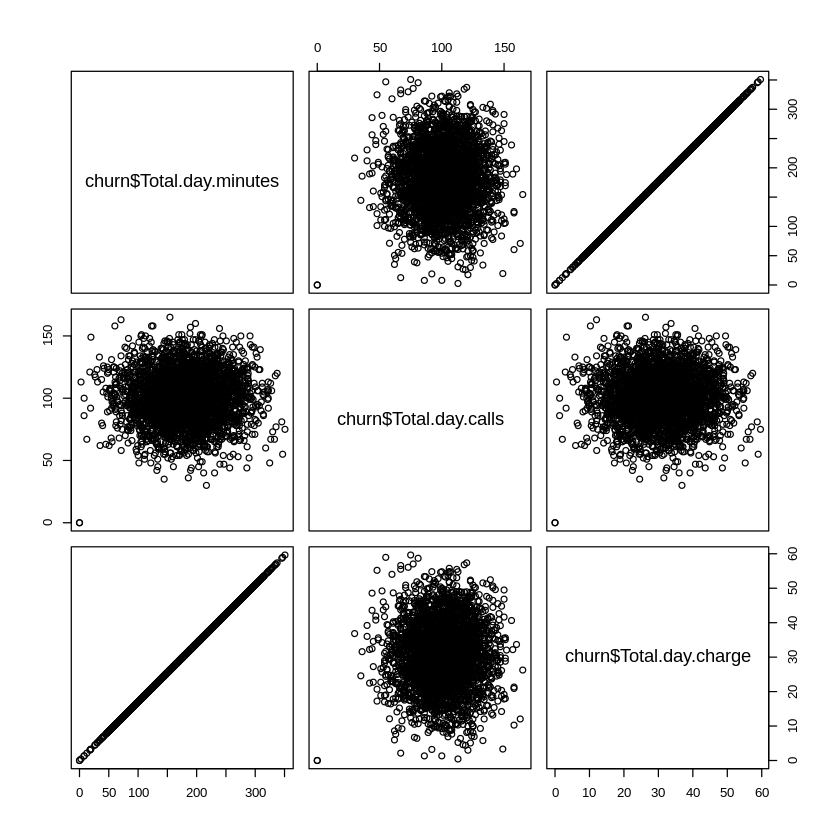

In [22]:
# Scatterplot matrix
pairs(~ churn$Total.day.minutes + churn$Total.day.calls + churn$Total.day.charge)

In [23]:
# Regression of Day Charge vs Day Minutes
fit <- lm(churn$Total.day.charge ~ churn$Total.day.minutes)
summary(fit)


Call:
lm(formula = churn$Total.day.charge ~ churn$Total.day.minutes)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0045935 -0.0025391  0.0004326  0.0024587  0.0045224 

Coefficients:
                         Estimate Std. Error   t value Pr(>|t|)    
(Intercept)             6.134e-04  1.711e-04 3.585e+00 0.000341 ***
churn$Total.day.minutes 1.700e-01  9.108e-07 1.866e+05  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.002864 on 3331 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 3.484e+10 on 1 and 3331 DF,  p-value: < 2.2e-16


In [34]:
# Correlation values, with p-values
days <- cbind(churn$Total.day.minutes, churn$Total.day.calls, churn$Total.day.charge)
MinsCallsTest <- cor.test(churn$Total.day.minutes, churn$Total.day.calls)
MinsChargeTest <- cor.test(churn$Total.day.minutes, churn$Total.day.charge)
CallsChargeTest <- cor.test(churn$Total.day.calls, churn$Total.day.charge)
round(cor(days),4)

1.0000,0.0068,1.0000
0.0068,1.0000,0.0068
1.0000,0.0068,1.0000


In [25]:
MinsCallsTest$p.value
MinsChargeTest$p.value
CallsChargeTest$p.value

[1] 0.6968515

[1] 0

[1] 0.6967428

In [26]:
# Correlation values and p-values in matrix form
# Collect variables of interest
corrdata <- cbind(churn$Account.length,
          churn$Number.vmail.messages,
          churn$Total.day.minutes,
          churn$Total.day.calls,
          churn$Customer.service.calls)


In [27]:
# Declare the matrix
corrpvalues <- matrix(rep(0, 25), ncol = 5)

In [28]:
  # Fill the matrix with correlations
for (i in 1:4) {
    for (j in (i+1):5) {
        corrpvalues[i,j] <-
            corrpvalues[j,i] <-
            round(cor.test(corrdata[,i],
                           corrdata[,j])$p.value,4)
    }
}
round(cor(corrdata), 4)

1.0000,-0.0046,0.0062,0.0385,-0.0038
-0.0046,1.0000,0.0008,-0.0095,-0.0133
0.0062,0.0008,1.0000,0.0068,-0.0134
0.0385,-0.0095,0.0068,1.0000,-0.0189
-0.0038,-0.0133,-0.0134,-0.0189,1.0000


In [29]:
corrpvalues  

0.0000,0.7894,0.7198,0.0264,0.8266
0.7894,0.0000,0.9642,0.5816,0.4440
0.7198,0.9642,0.0000,0.6969,0.4385
0.0264,0.5816,0.6969,0.0000,0.2743
0.8266,0.4440,0.4385,0.2743,0.0000
